<div style="background: #DDE2FF;
            font-family: Bookerly;
            font-size: 16px; 
            font-weight: 100;
            padding: 20px 5px 0px 5px; 
            border: 10px solid #DDE2FF; 
            margin-left: 1px;
            margin-right: 1px;"
          
 <font color='blue'>**Chapter 31-5: Elliptic PDEs Using the Monte Carlo Method**.
 
 Monte Carlo Methods are a class of computational solutions
that can be applied to various problems which rely on 
repeated random sampling to provide generally approximate 
solutions. Monte Carlo is a stochastic approach, in which a
series of simulations (trials), representing the analyzed problem, with randomly selected input values, are performed. Among 
these trials, a specified number of properly defined successes is
achieved. The ratio between the number of success trials to the 
number of all trials, scaled by dimensional quantity (e.g., area or 
function value) allows for the estimation of the unknown 
solution, providing the number of trials is large enough. 
 
 

 

<br>

  </font>
  
  
  
</div>

<div style="background: #FFE3CC;
            font-family: Bookerly;
            font-size: 16px; 
            font-weight: 100;
            padding: 15px 5px 10px 5px;
            border: 10px solid #FFE3CC;  
            margin-left: 1px;
            margin-right: 1px;"
     
<font color='blue'>A capacitor is constructed out of two infinite metal plates
spaced 10 cm apart from one another. One plate is placed at 5V 
potential with respect to the other and the space between the 
plates is free of charges. The number of random walks is taken 
to be 400 and the number of lattice points is taken to be 30.

(The description of the problem and the code solution was taken from the repository of s-ankur.)

 



</font>
</div>

Calculating Monte Carlo with 30x30 lattice points and 400 random walks


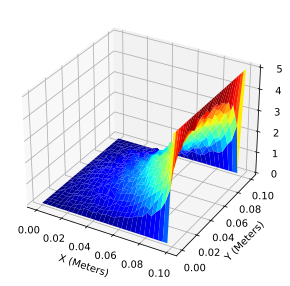

NameError: name 'laplace' is not defined

In [3]:
"""
All calculations in SI units
"""
import random
from mpl_toolkits.mplot3d import axes3d
import matplotlib.pyplot as plt
from matplotlib import cm
import numpy as np
%config InlineBackend.figure_formats = ['svg']

h = 10e-2  # Distance between plates = 10cm
lattice_points = 30  # Number of Points in lattice
d = h / lattice_points  # Lattice size
boundary_voltage_high = 5.0  # 5 Volts at Positive Plate
boundary_voltage_low = 0.0  # 0 Volts at Negative Plate
epsilon_naught = 8.854e-12  # Permittivity of Vaccum
charge_density = 6e-16  # Coulomb per meter cube
N = 400  # Number of Random Walks


def f(x):
    # The Function \nabla^2(phi)  = f
    # For Laplace f = 0
    return 0


def g(x):
    # Two Dimensional Boundary Conditions: two parallel metal plates at x=0,x=h
    # the plate at x=h is at high potential and x=0 is low potential
    # Assume that there are metal plates along y=0 and y=h (uncharged)
    # this is because I dont know how to simulate open boundry conditions
    if x[0] <= 0:
        return boundary_voltage_low
    if x[0] >= h:
        return boundary_voltage_high
    if x[1] <= 0 or x[1] >= h:
        return boundary_voltage_low

"""
def f_2(x):
    # Alternative charge distribution: A charged Sphere in the centre of metal box
    if (h / 2 - x[0]) ** 2 + (h / 2 - x[1]) ** 2 <= (h / 5) ** 2:
        return -charge_density * 5 / epsilon_naught
    else:
        return 0


def g_2(x):
    # Two Dimentional Alternative Boundary Conditions: uncharged metal box
    return 0
"""


def f_3(x):
    # Alternative charge distribution: TWO charged Sphere in the centre of metal box
    if (h / 3 - x[0]) ** 2 + (h / 2 - x[1]) ** 2 <= (h / 5) ** 2:
        return -charge_density * 5 / epsilon_naught
    if (2 * h / 3 - x[0]) ** 2 + (h / 2 - x[1]) ** 2 <= (h / 5) ** 2:
        return charge_density * 5 / epsilon_naught
    else:
        return 0


@np.vectorize
def poisson_approximation_fixed_step(*A):
    # Returns the Value of Potential Feild at a given point A with N random walks
    result = 0
    F = 0
    for i in range(N):
        x = list(A)
        while True:
            if x[0] <= 0 or x[0] >= h or x[1] <= 0 or x[1] >= h:
                break
            random_number = random.randint(0, 3)
            if random_number == 0:
                x[0] += d
            elif random_number == 1:
                x[0] -= d
            elif random_number == 2:
                x[1] += d
            elif random_number == 3:
                x[1] -= d
            F += f(x) * h ** 2
        result += g(x) / N
    result = result - F
    return result


def plot(x, y, z):
    # Function for plotting the potential
    fig = plt.figure()
    ax = fig.add_subplot(111, projection="3d")

    ax.plot_surface(x, y, np.array(z), cmap=cm.jet, linewidth=0.1)
    plt.xlabel("X (Meters)")
    plt.ylabel("Y (Meters)")
    ax.set_zlabel("Potential (Volts)")
    plt.show()


if __name__ == "__main__":
    # Experiment E: 2D Capacitor
    print(
        f"Calculating Monte Carlo with {lattice_points}x{lattice_points} lattice points and {N} random walks"
    )
    lattice_x, lattice_y = np.mgrid[
        0 : h : lattice_points * 1j, 0 : h : lattice_points * 1j
    ]
    z = poisson_approximation_fixed_step(lattice_x.ravel(), lattice_y.ravel()).reshape(
        lattice_x.shape
    )
    plot(lattice_x, lattice_y, z)

    # Experiment F: Metal box with positively charged metal ball inside
 #   f = f2
 #   g = g2
    print(
        f"Calculating Monte Carlo with {lattice_points}x{lattice_points} lattice points and {N} random walks for {'Laplace' if laplace else 'Poisson'}"
    )
    lattice_x, lattice_y = np.mgrid[
        0 : h : lattice_points * 1j, 0 : h : lattice_points * 1j
    ]
    z = poisson_approximation_fixed_step(lattice_x.ravel(), lattice_y.ravel()).reshape(
        lattice_x.shape
    )
    plot(lattice_x, lattice_y, z)

    # Experiment G: Metal Box with two spheres (positive and negative)

    f = f_3
    g = g_2
    print(
        f"Calculating Monte Carlo with {lattice_points}x{lattice_points} lattice points and {N} random walks"
    )
    lattice_x, lattice_y = np.mgrid[
        0 : h : lattice_points * 1j, 0 : h : lattice_points * 1j
    ]
    z = poisson_approximation_fixed_step(lattice_x.ravel(), lattice_y.ravel()).reshape(
        lattice_x.shape
    )
    plot(lattice_x, lattice_y, z)

    
    
    
    
    
    
    
    
    
    

<div style="background: #E2FFCC;
            font-family: Bookerly;
            font-size: 16px; 
            font-weight: 100;
            padding: 10px 5px 10px 5px; 
            border: 10px solid #E2FFCC; 
            margin-left: 1px;
            margin-right: 1px;"

<font color='blue'>At the address: https://srome.github.io/On-Solving-Partial-Differential-Equations-with-Brownian-Motion-in-Python/ there is an interesting blog about doing pde solving with Brownian motion approximation. However, BM is not exactly Monte Carlo. (At least the Laplace equation is parabolic.) So what is this doing in this notebook? Well, it is interesting, and does relate, essentially, to Monte Carlo methods. And besides, it took 7.5 hrs for a 13700K processor to spit out the graphics for it, so they are not about to be wasted.
</font>                 
</div>

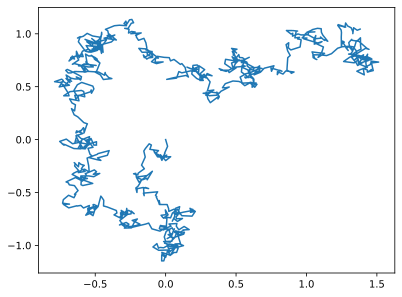

In [7]:
    #%matplotlib inline
    import numpy as np
    import matplotlib.pyplot as plt
    
    t=1
    n = 1000
    delta_t = np.sqrt(t/n)
    
    # Create each dW step
    dW1 = delta_t * np.random.normal(0,1,size=n)
    dW2 = delta_t * np.random.normal(0,1,size=n)
    W = np.zeros((n+1,2))
    
    # Add W_{j-1} + dW_{j-1} 
    W[1:,0] = np.cumsum(dW1)
    W[1:,1] = np.cumsum(dW2)
    
    plt.plot(W[:,0],W[:,1], '-')
    
    

<div style="background: #E2FFCC;
            font-family: Bookerly;
            font-size: 16px; 
            font-weight: 100;
            padding: 10px 5px 10px 5px; 
            border: 10px solid #E2FFCC; 
            margin-left: 1px;
            margin-right: 1px;"

<font color='blue'>Above: a random Brownian walk. Very similar to a random Monto Carlo walk.
</font>                 
</div>

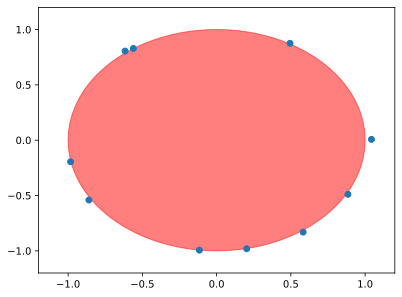

In [8]:
    def check_if_exit(v):
        # Takes a vector v=(x,y)
        # Checks if v has intersected with the boundary of D
        if np.linalg.norm(v,2) >=1:
            return True
        return False
    
    def simulate_exit_time(v):
        # Simulates exit time starting at v=(x,y), returns exit position
        delta_t = np.sqrt(.001)
        exit = False
        x = v.copy()
        while not exit:
            x = x + delta_t * np.random.normal(0,1,size=2)
            exit = check_if_exit(x)
        return x
    
    v=np.array((0,0)) # The origin
    exit_times = np.array([simulate_exit_time(v) for k in range(0,10) ])


    circle1=plt.Circle((0,0),1,color='r', alpha=.5)
    plt.gcf().gca().add_artist(circle1)
    plt.axis([-1.2, 1.2, -1.2, 1.2])
    plt.scatter(exit_times[:,0],exit_times[:,1])
    
    

<div style="background: #E2FFCC;
            font-family: Bookerly;
            font-size: 16px; 
            font-weight: 100;
            padding: 10px 5px 10px 5px; 
            border: 10px solid #E2FFCC; 
            margin-left: 1px;
            margin-right: 1px;"

<font color='blue'>Above: simulated exit points on an ellipse, fairly similar to the epsilon criterion for deciding when a random step reaches the domain boundary in the WOS (walk on spheres) version of the pde solver.
</font>                 
</div>

In [4]:
    np.random.seed(8) #Side Infinity
    
    def check_if_exit(v):
        # Takes a vector v=(x,y)
        # Checks if v has intersected with the boundary of D
        if np.linalg.norm(v,2) >=1:
            return True
        return False
    
    def simulate_exit_time(v):
        # Simulates exit time starting at v=(x,y), returns exit position
        delta_t = np.sqrt(.001)
        exit = False
        
        # Copy because simulation modifies in place
        if hasattr(v,'copy'): # For NumPy arrays
            x = v.copy() 
        else:
            x = np.array(v) # We input a non-NumPy array
        while not exit:
            x += delta_t * np.random.normal(0,1,size=2) # += modifies in place
            exit = check_if_exit(x)
        return x
        
    v=np.array((.5,.5)) # The origin
    u = lambda x : np.linalg.norm(x,2)*np.cos(np.arctan2(x[1],x[0]))
    f = lambda x : np.cos(np.arctan2(x[1],x[0]))
    
    def get_exp_f_exit(starting_point, n_trials): 
        return np.mean([f(simulate_exit_time(starting_point)) for k in range(0,n_trials)])
    
    exp_f_exit = get_exp_f_exit(v,2000) # Expected value of f(Exit(x,d))
    print('The value u(v) = %s\nThe value of Exp(f(Exit))=%s' %(u(v), exp_f_exit)) 
    
    

The value u(v) = 0.5000000000000001
The value of Exp(f(Exit))=0.4975601145395467


(100, 100)


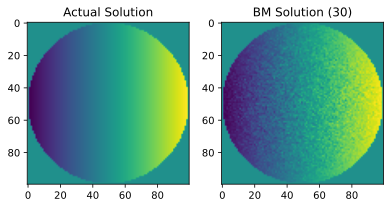

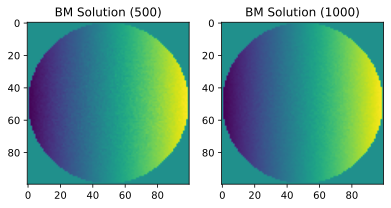

In [5]:
    lin = np.linspace(-1, 1, 100)
    x, y = np.meshgrid(lin, lin)
    print(x.shape)
    u_vec = np.zeros(x.shape)
    bm_vec_30 = np.zeros(x.shape)
    bm_vec_500 = np.zeros(x.shape)
    bm_vec_1000 = np.zeros(x.shape)
    
    # Convert u to a solution in x,y coordinates
    u_x = lambda x,y : np.linalg.norm(np.array([x,y]),2)*np.cos(np.arctan2(y,x))
    
    # Calculate actual and approximate solution for (x,y) in D
    for k in range(0,x.shape[0]):
        for j in range(0,x.shape[1]):
            x_t = x[k,j]
            y_t = y[k,j]
            
            # If the point is outside the circle, the solution is undefined
            if np.sqrt((x_t)**2 + (y_t)**2) > 1:
                continue
            
            # Calculate function value at this point for each image
            u_vec[k,j] = u_x(x_t,y_t)
            bm_vec_30[k,j] = get_exp_f_exit((x_t,y_t),30)
            bm_vec_500[k,j] =  get_exp_f_exit((x_t,y_t),500)
            bm_vec_1000[k,j] =  get_exp_f_exit((x_t,y_t),1000)

    fig = plt.figure()
    ax = fig.add_subplot(121)
    plt.imshow(u_vec)
    plt.title('Actual Solution')
    
    ax = fig.add_subplot(122)
    plt.title('BM Solution (30)')
    plt.imshow(bm_vec_30)
    
    fig = plt.figure()
    
    ax = fig.add_subplot(121)
    plt.title('BM Solution (500)')
    plt.imshow(bm_vec_500)
    
    ax = fig.add_subplot(122)
    plt.title('BM Solution (1000)')
    plt.imshow(bm_vec_1000)
    
    

<div style="background: #E2FFCC;
            font-family: Bookerly;
            font-size: 16px; 
            font-weight: 100;
            padding: 10px 5px 10px 5px; 
            border: 10px solid #E2FFCC; 
            margin-left: 1px;
            margin-right: 1px;"

<font color='blue'>Above: Brownian motion solutions, rather similar to the walk on spheres output for a parabolic pde performed with Monte Carlo.
</font>                 
</div>